# Feed forward loop

In [1]:
from pylab import *
%matplotlib inline

In [2]:
## Basic functions

In [3]:
def hA(x, n=2):
    return x**n/(1+x**n)

def hR(x, n=2):
    return 1/(1+x**n)

def AND(a,b):
    return a*b

def OR(a,b):
    return (a+b)/(1+a*b)

## Coherent FFL with AND input

In [4]:
T = 16
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt-1

x0 = 1
y0 = z0 = 0
kxy = kxz = kyz =  0.5
n=10

xs = zeros(N)
ys = zeros(N)
zs = zeros(N)

xs[ts>0] = 1
xs[ts>5] = 0
xs[(ts>10)*(ts<10.5)] = 1

ys[0] = y0
zs[0] = z0


for i in range(1,N):
    dydt = hA(xs[i-1]/kxy, n)-ys[i-1]
    dzdt = AND(hA(xs[i-1]/kxz, n), hA(ys[i-1]/kyz, n))-zs[i-1]
    ys[i] = ys[i-1]+dt*dydt
    zs[i] = zs[i-1]+dt*dzdt
    
# # Runge Kutta RK2 version   
# for i in range(1,N):
#     dydt = hA(xs[i-1]/kxy, n)-ys[i-1]
#     dzdt = AND(hA(xs[i-1]/kxz, n), hA(ys[i-1]/kyz, n))-zs[i-1]
#     x1 = (xs[i-1]+xs[i])/2
#     y1 = ys[i-1]+dydt*dt/2
#     z1 = zs[i-1]+dzdt*dt/2
    
#     dydt = hA(x1/kxy, n)-y1
#     dzdt = AND(hA(x1/kxz, n), hA(y1/kyz, n))-z1
#     ys[i] = ys[i-1]+dt*dydt
#     zs[i] = zs[i-1]+dt*dzdt

Text(0, 0.5, 'normalized concentrations')

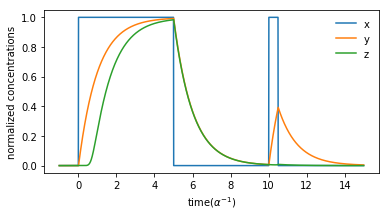

In [6]:
figure(figsize=(6,3))
plot(ts, xs, label="x")
plot(ts, ys, label="y")
plot(ts, zs, label="z")
legend(frameon=False)
xlabel("time($\\alpha^{-1}$)")
ylabel("normalized concentrations")

Sign sensitive delay: $z$ response is delayed on positive steps, filters out positive spikes

## Coherent FFL with OR input

In [7]:
T = 16
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt-1

x0 = 1
y0 = z0 = 0
kxy = kxz = kyz =  0.5
n=10

xs = zeros(N)
ys = zeros(N)
zs = zeros(N)

xs[ts>0] = 1
xs[(ts>5)*(ts<5.5)] = 0
xs[ts>10] = 0

ys[0] = y0
zs[0] = z0


for i in range(1,N):
    dydt = hA(xs[i-1]/kxy, n)-ys[i-1]
    dzdt = OR(hA(xs[i-1]/kxz, n), hA(ys[i-1]/kyz, n))-zs[i-1]
    ys[i] = ys[i-1]+dt*dydt
    zs[i] = zs[i-1]+dt*dzdt

Text(0, 0.5, 'normalized concentrations')

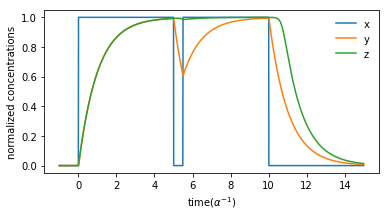

In [8]:
figure(figsize=(6,3))
plot(ts, xs, label="x")
plot(ts, ys, label="y")
plot(ts, zs, label="z")
legend(frameon=False)
xlabel("time($\\alpha^{-1}$)")
ylabel("normalized concentrations")

Sign sensitive delay: $z$ response is delayed on negative steps, filters out negative spikes

## Incoherent FFL with AND input

In [9]:
T = 16
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt-1

x0 = 1
y0 = z0 = 0
kxy = kxz = kyz =  0.5
n=10

xs = zeros(N)
ys = zeros(N)
zs = zeros(N)

xs[ts>0] = x0

ys[0] = y0
zs[0] = z0

for i in range(1,N):
    dydt = hA(xs[i-1]/kxy, n)-ys[i-1]
    dzdt = AND(hA(xs[i-1]/kxz, n), hR(ys[i-1]/kyz, n))-zs[i-1]
    ys[i] = ys[i-1]+dt*dydt
    zs[i] = zs[i-1]+dt*dzdt

Text(0, 0.5, 'normalized concentrations')

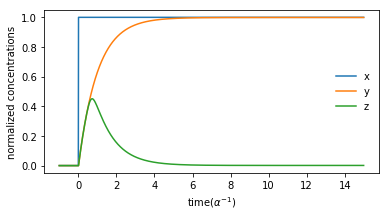

In [10]:
figure(figsize=(6,3))
plot(ts, xs, label="x")
plot(ts, ys, label="y")
plot(ts, zs, label="z")
legend(frameon=False)
xlabel("time($\\alpha^{-1}$)")
ylabel("normalized concentrations")

Plused $z$ response

LIFO

In [1]:
T = 20
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt-1

w0 = 1
x0 = z10 = z20 = 0
ksw = kwx =  0.5
kwz1 = 1/3
kwz2 = 2/3


n=10

ws = zeros(N)
xs = zeros(N)
z1s = zeros(N)
z2s = zeros(N)

ws[ts>0] = 2

ws[ts>8] = 0

xs[0] = x0
z1s[0] = z10
z2s[0] = z20



for i in range(1,N):
    
    dxdt = hA(ws[i-1]/kwx, n) - xs[i-1]
    dz1dt = hA(xs[i-1]/kwz1, n)-z1s[i-1]
    dz2dt = hA(xs[i-1]/kwz2, n) -z2s[i-1]
    
    xs[i] = xs[i-1]+dt*dxdt
    z1s[i] = z1s[i-1]+dt*dz1dt
    z2s[i] = z2s[i-1]+dt*dz2dt

NameError: name 'arange' is not defined

Text(0, 0.5, 'normalized concentrations')

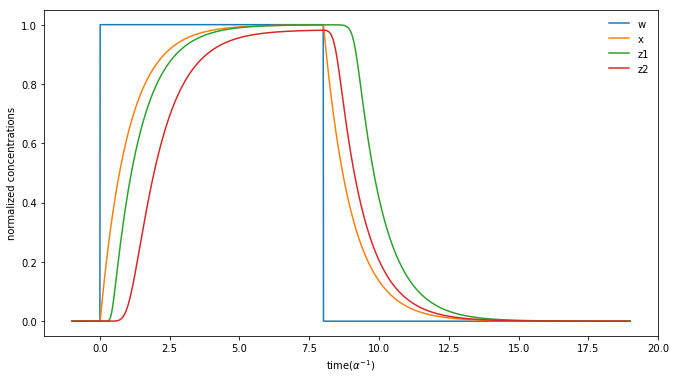

In [77]:
figure(figsize=(11,6))
plot(ts, ws, label="w")
plot(ts, xs, label="x")
plot(ts, z1s, label="z1")
plot(ts, z2s, label="z2")
legend(frameon=False)
xlabel("time($\\alpha^{-1}$)")
ylabel("normalized concentrations")

FIFO

In [82]:
T = 14
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt-1

w0 = 1
x0 = y0 = z10 = z20 = 0
ksw = kwx = kxy = 0.5
kxz1 = 1/3
kxz2 = 2/3
kyz1 = 2/3
kyz2 = 1/3
n=10

ws = zeros(N)
xs = zeros(N)
ys = zeros(N)
z1s = zeros(N)
z2s = zeros(N)

ws[ts>0] = 1

ws[ts>7] = 0

xs[0] = x0
ys[0] = y0
z1s[0] = z10
z2s[0] = z20



for i in range(1,N):
    
    dxdt = hA(ws[i-1]/kwx, n) - xs[i-1]
    dydt = hA(xs[i-1]/kxy, n) - ys[i-1]
    dz1dt = OR(hA(xs[i-1]/kxz1, n), hA(ys[i-1]/kyz1, n))-z1s[i-1]
    dz2dt = OR(hA(xs[i-1]/kxz2, n), hA(ys[i-1]/kyz2, n))-z2s[i-1]
    
    xs[i] = xs[i-1]+dt*dxdt
    ys[i] = ys[i-1]+dt*dydt
    z1s[i] = z1s[i-1]+dt*dz1dt
    z2s[i] = z2s[i-1]+dt*dz2dt

Text(0, 0.5, 'normalized concentrations')

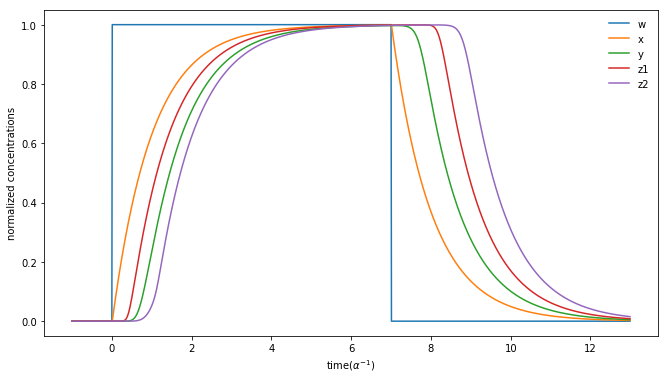

In [83]:
figure(figsize=(11,6))
plot(ts, ws, label="w")
plot(ts, xs, label="x")
plot(ts, ys, label=("y"))
plot(ts, z1s, label="z1")
plot(ts, z2s, label="z2")
legend(frameon=False)
xlabel("time($\\alpha^{-1}$)")
ylabel("normalized concentrations")